In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

datacsv = pd.read_csv('29dataset_dropped_opt.csv', index_col=0)
df = pd.DataFrame(data = datacsv)
df

,E(RB3LYP),Dipole Moment,Polarizability (a),Zero-point Energy Correction,C=O stretch\nFrequency,C=O stretch\nRaman Activity,C=O stretch\nDepolar-P,C2-H stretch\nFrequency,C2-H stretch\nDepolar-P,O NBO Charge,...,L,B1,B5,LUMO(chk),HOMO(chk),X=O(ONBO),X=O(CNBO),"C Length(X=O,CHO)",A_para,B_para
M1,-384.890280,2.976386,82.320667,0.138206,1792.56,67.2699,0.3176,2895.10,0.2969,-0.536,...,6.75,1.76,4.33,0.01238,-0.24837,0.000,0.000,0.00000,0.74,0.31
M2,-384.891819,3.393730,82.941333,0.137724,1799.19,82.1492,0.3278,2905.37,0.3060,-0.531,...,6.75,1.76,4.40,0.01381,-0.24819,0.000,0.000,0.00000,0.78,0.39
M3,-384.892348,3.780420,84.218000,0.137661,1797.59,103.3745,0.3431,2903.04,0.3077,-0.533,...,7.70,1.81,3.16,0.01495,-0.25054,0.000,0.000,0.00000,0.79,0.36
M4,-460.095229,4.813919,87.394333,0.143198,1782.58,82.3785,0.2987,2995.61,0.2999,-0.541,...,6.76,1.75,5.37,0.02047,-0.24760,0.000,0.000,0.00000,0.98,0.49
M5,-460.097202,2.178176,87.727333,0.143040,1796.18,87.0887,0.3267,2913.73,0.3037,-0.533,...,6.75,1.75,5.35,0.01238,-0.25296,0.000,0.000,0.00000,0.73,0.42
M6,-460.098685,4.988572,90.681000,0.143103,1792.93,139.4349,0.3464,2896.49,0.3137,-0.540,...,8.85,1.78,3.18,0.01690,-0.25130,0.000,0.000,0.00000,0.84,0.29
M7,-2916.675203,3.248754,88.329333,0.100233,1791.24,61.3724,0.2859,3000.48,0.2480,-0.525,...,6.78,1.78,4.86,-0.00043,-0.26416,0.000,0.000,0.00000,0.73,0.53
M8,-2916.676864,1.869718,89.644000,0.100118,1804.15,84.9797,0.3394,2918.78,0.3033,-0.521,...,6.86,1.77,4.83,-0.00168,-0.26249,0.000,0.000,0.00000,0.76,0.62
M9,-2916.677538,2.065982,91.846667,0.100110,1800.83,146.4000,0.3339,2913.59,0.2997,-0.525,...,8.51,1.95,3.16,-0.00253,-0.26684,0.000,0.000,0.00000,0.89,0.56
M10,-424.203430,2.994698,94.245667,0.166295,1778.72,64.2892,0.2735,2962.69,0.3055,-0.540,...,6.81,1.88,5.60,-0.06031,-0.24371,0.000,0.000,0.00000,0.98,0.28


In [2]:
df2 = df.drop('M8')
df3 = df2.drop('M18')
df4 = df3.drop('M1')

In [3]:
X_train = df4.iloc[:26,:19].values  # 説明変数
y_train = df4.iloc[:26,20].values   # 目的変数

In [4]:
A8 =df.iloc[7,0:]
A18 =df.iloc[17,0:]
A1 =df.iloc[0,0:]

In [5]:
testframe = pd.DataFrame(data = (A8,A18,A1))

In [6]:
X_test = testframe.iloc[0:3,:19]
y_test = testframe.iloc[0:3,20]
print(X_test)
print(y_test)

       E(RB3LYP)  Dipole Moment  Polarizability (a)  \
M8  -2916.676864       1.869718           89.644000   
M18 -1264.748798       4.137538           93.296667   
M1   -384.890280       2.976386           82.320667   

     Zero-point Energy Correction  C=O stretch\nFrequency  \
M8                       0.100118                 1804.15   
M18                      0.090566                 1802.42   
M1                       0.138206                 1792.56   

     C=O stretch\nRaman Activity  C=O stretch\nDepolar-P  \
M8                       84.9797                  0.3394   
M18                      54.6829                  0.2500   
M1                       67.2699                  0.3176   

     C2-H stretch\nFrequency  C2-H stretch\nDepolar-P  O NBO Charge  \
M8                   2918.78                   0.3033        -0.521   
M18                  3015.69                   0.2694        -0.501   
M1                   2895.10                   0.2969        -0.536   

     C2-

In [7]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(X_train)
X_train_st_lasso = standard.transform(X_train)
X_test_st_lasso = standard.transform(X_test)

In [8]:
lasso = Lasso(alpha=0.01,random_state=0)
lasso_train = lasso.fit(X_train_st_lasso, y_train)

In [9]:
from sklearn.metrics import r2_score

y_pred_lasso_train = lasso_train.predict(X_train_st_lasso)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

print(y_pred_lasso_train)

y_pred_lasso_test = lasso_train.predict(X_test_st_lasso)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
# print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)
print(lasso_train.coef_, lasso_train.intercept_)

[0.36923994 0.27197635 0.41458897 0.47186887 0.25602449 0.56663763
 0.48995866 0.39765769 0.15510009 0.26054022 0.55892493 0.40429726
 0.36590051 0.40547097 0.40830788 0.46970307 0.23584704 0.32990233
 0.43970731 0.62073088 0.29746225 0.44880171 0.36827949 0.62232118
 0.61370968 0.48704059]
R2_score (train):  0.7074767132810533
R2_score (test):  0.8678429712296964
RMSE:  0.054002454588021886
[-0.00417422 -0.01558055  0.06363323 -0.19939327  0.          0.
  0.06188994 -0.         -0.         -0.          0.          0.
  0.01676243  0.1510841   0.         -0.01533946 -0.02441014  0.00379505
  0.        ] 0.4126923076923077


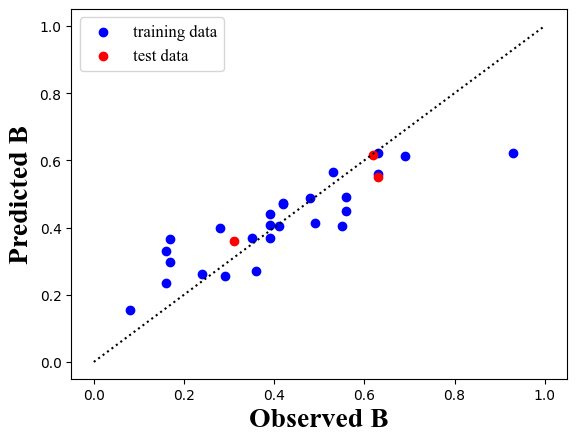

In [31]:
plt.scatter(y_train, y_pred_lasso_train, color='blue', label="training data")
plt.scatter(y_test, y_pred_lasso_test, color='red', label="test data")
plt.plot([0,1], [0,1], color='black', linestyle = "dotted")

plt.xlabel('Observed B', fontname="times new roman", fontsize=20, fontweight =1000)
plt.ylabel('Predicted B', fontname="times new roman", fontsize=20, fontweight =1000)
plt.legend(loc='upper left', prop = {"family" : "times new roman", "size": "large"})
plt.savefig('B_prediction.png', dpi=200)

In [14]:
#以下決定木

In [11]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(X_train)
X_train_st_dt = standard.transform(X_train)
X_test_st_dt = standard.transform(X_test)
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5,random_state = 0)
dt.fit(X_train_st_dt, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [12]:
from sklearn.metrics import r2_score

cv_dt = cross_val_score(estimator = dt, X = X_train_st_dt, y = y_train, cv = 10)

y_pred_dt_train = dt.predict(X_train_st_dt)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

y_pred_dt_test = dt.predict(X_test_st_dt)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  -4.9610678855051535
R2_score (train):  0.949860624879704
R2_score (test):  -2.3046429170862694
RMSE:  0.27004157773147397


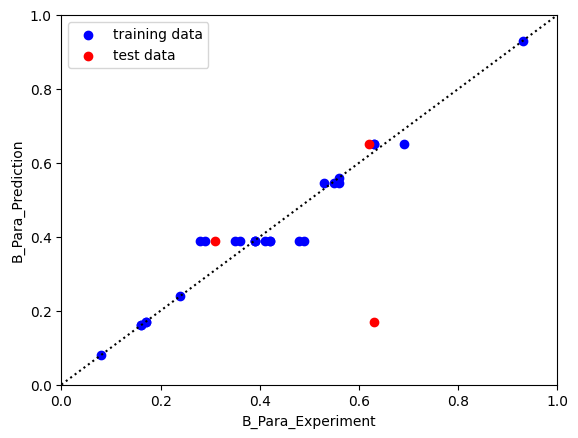

In [13]:
plt.scatter(y_train, y_pred_dt_train, label='training data', color='blue')
plt.scatter(y_test, y_pred_dt_test,  color='red', label = 'test data')
plt.plot([0,1], [0,1], color='black', linestyle='dotted')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('B_Para_Experiment')
plt.ylabel('B_Para_Prediction')
plt.legend()
plt.savefig('B_para_DT.png', dpi=200)

In [19]:
#以下ランダムフォレスト

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

standard = StandardScaler()
standard.fit(X_train)
X_train_st_rf = standard.transform(X_train)
X_test_st_rf = standard.transform(X_test)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, max_depth=5, random_state = 0)
rf.fit(X_train_st_rf, y_train)
from sklearn.metrics import r2_score

cv_rf = cross_val_score(estimator=rf,X=X_train_st_rf,y=y_train,cv=10)

y_pred_rf_train = rf.predict(X_train_st_rf)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = rf.predict(X_test_st_rf)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  -1.168819387308691
R2_score (train):  0.8156653535744397
R2_score (test):  0.5139867451424815
RMSE:  0.10356009120565014


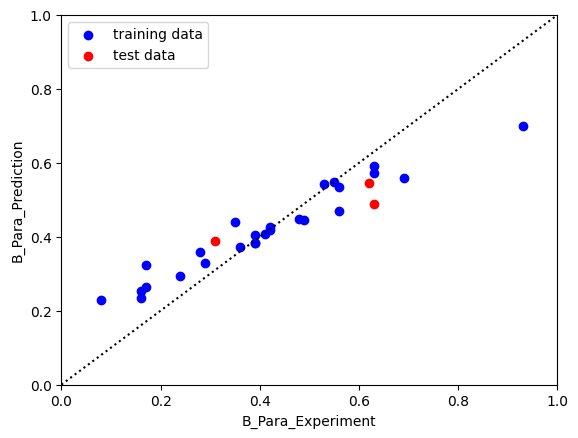

In [15]:
plt.scatter(y_train, y_pred_rf_train, label='training data', color='blue')
plt.scatter(y_test, y_pred_rf_test, color='red', label = 'test data')
plt.plot([0,1], [0,1], color='black', linestyle='dotted')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('B_Para_Experiment')
plt.ylabel('B_Para_Prediction')
plt.legend()
plt.savefig('B_para_RF.png', dpi=200)

In [22]:
#以下サポートベクター

In [16]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

standard = StandardScaler()
standard.fit(X_train)
X_train_st_sv = standard.transform(X_train)
X_test_st_sv = standard.transform(X_test)

svr = SVR(kernel='rbf', gamma=0.1, C=10)
svr_train = svr.fit(X_train_st_sv, y_train)

from sklearn.metrics import r2_score

cv_svr = cross_val_score(estimator=svr,X=X_train_st_sv,y=y_train,cv=10)

y_pred_svr_train = svr.predict(X_train_st_sv)
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test_st_sv)
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)

CV:  -1.3469451949551448
R2_score (train):  0.8085823221775486
R2_score (test):  -0.19660545808998164
RMSE:  0.16249644234624214


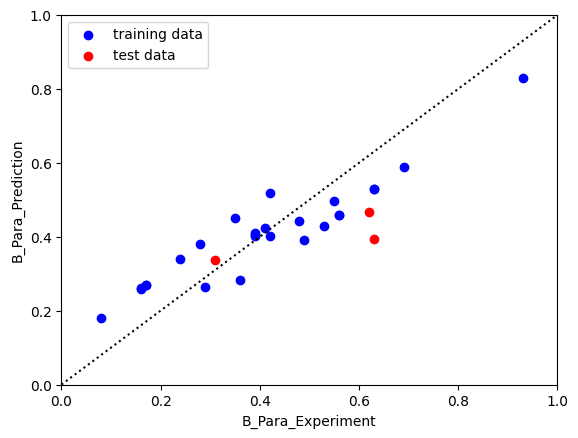

In [17]:
plt.scatter(y_train, y_pred_svr_train, label='training data', color='blue')
plt.scatter(y_test, y_pred_svr_test, color='red', label = 'test data')
plt.plot([0,1], [0,1], color='black', linestyle='dotted')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('B_Para_Experiment')
plt.ylabel('B_Para_Prediction')
plt.legend()
plt.savefig('B_para_SV.png', dpi=200)